In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import time

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from auxiliar_func import *
from plot_func import *

In [2]:
df = pd.read_csv('Census-Income-KDD.csv')
target = 'income_50k'
df_tr, df_te = train_test_split(df, test_size=0.3, random_state=42)

## Finding the best preprocessing parameters

In [3]:
params = {
    'scaling': [None],
    'imputation': ['mode', 'nacat', 'dropna'],
    'cat_age': [False, True],
    'target_freq': [0.7, 0.8, 0.9]
}

rf = RandomForestClassifier(random_state=42, n_estimators=22, max_depth=30, n_jobs=-1, class_weight={0: 1, 1: 1.5})
results = test_preprocess_params(df_tr, rf, params)

results.to_csv('results_rf.csv', index=False)

Adjusting for (None, 'mode', False, 0.7)
Adjusting for (None, 'mode', False, 0.8)
Adjusting for (None, 'mode', False, 0.9)
Adjusting for (None, 'mode', True, 0.7)
Adjusting for (None, 'mode', True, 0.8)
Adjusting for (None, 'mode', True, 0.9)
Adjusting for (None, 'nacat', False, 0.7)
Adjusting for (None, 'nacat', False, 0.8)
Adjusting for (None, 'nacat', False, 0.9)
Adjusting for (None, 'nacat', True, 0.7)
Adjusting for (None, 'nacat', True, 0.8)
Adjusting for (None, 'nacat', True, 0.9)
Adjusting for (None, 'dropna', False, 0.7)
Adjusting for (None, 'dropna', False, 0.8)
Adjusting for (None, 'dropna', False, 0.9)
Adjusting for (None, 'dropna', True, 0.7)
Adjusting for (None, 'dropna', True, 0.8)
Adjusting for (None, 'dropna', True, 0.9)


In [3]:
df_tr_pre = preprocessing(df_tr, scaling=None, imputation='mode', cat_age=False, target_freq=0.8)
df_te_pre = preprocessing(df_te, scaling=None, imputation='mode', remove_duplicates=False, cat_age=False)

df_tr_pre, df_te_pre = df_tr_pre.align(df_te_pre, join='left', axis=1, fill_value=0)
df_tr_pre.shape, df_te_pre.shape

((43975, 474), (59857, 474))

## Adjusting a random forest model

Accuracy: 0.9445678867968659


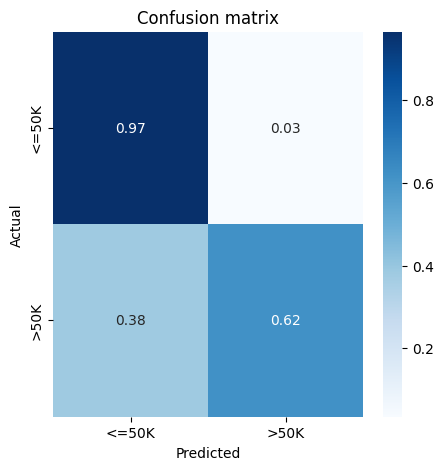

In [7]:
X_train, y_train = df_tr_pre.drop(target, axis=1), df_tr_pre[target]
X_test, y_test = df_te_pre.drop(target, axis=1), df_te_pre[target]

rf = RandomForestClassifier(random_state=42, n_estimators=22, max_depth=30, n_jobs=-1)
rf.fit(X_train, y_train)

# predict the test set
y_pred = rf.predict(X_test)

# print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
plot_conf_matrix(y_test, y_pred)